hcc-data-complete-balanced.csv hcc-stages.txt
hcc-dataset                    hccSurvivalPrediction.ipynb
hcc-stages.csv
/Users/test-august/Google Drive/HCC ML
Training examples summary:


,Gender,Alcohol,Cirrhosis,Smoking,Diabetes,Obesity,Age,Nodule,Stage
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.750000,0.697917,0.854167,0.479167,0.343750,0.104167,-0.010802,0.029583,-0.025604
std,0.435286,0.461571,0.354792,0.502188,0.477452,0.307080,0.191312,0.356586,0.271436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.570000,-0.335000,-0.648000
25%,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.132000,-0.335000,-0.148000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.019000,-0.135000,0.102000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.128000,0.465000,0.102000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.320000,0.465000,0.352000


Validation examples summary:


,Gender,Alcohol,Cirrhosis,Smoking,Diabetes,Obesity,Age,Nodule,Stage
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.741935,0.709677,0.870968,0.516129,0.419355,0.161290,0.031355,0.039194,-0.067355
std,0.444803,0.461414,0.340777,0.508001,0.501610,0.373878,0.165567,0.333634,0.244839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.338000,-0.335000,-0.648000
25%,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.064000,-0.335000,-0.148000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.060000,0.065000,-0.148000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.156000,0.465000,0.102000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.306000,0.465000,0.352000


Training targets summary:


,Class
count,96.000000
mean,0.635417
std,0.483840
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Validation targets summary:


,Class
count,31.000000
mean,0.677419
std,0.475191
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


W1002 08:51:38.287816 4514674112 estimator.py:1811] Using temporary folder as model directory: /var/folders/cv/t5_6jtwn05q8yf37f860_qnm0000gp/T/tmpv1vly82z


Training model...
RMSE (on training data):
  period 00 : 0.67


W1002 08:51:49.024680 4514674112 deprecation.py:323] From /anaconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1066: get_checkpoint_mtimes (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file utilities to get mtimes.


  period 01 : 0.57
  period 02 : 0.52
  period 03 : 0.50


W1002 08:52:23.699338 4514674112 deprecation.py:323] From /anaconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


  period 04 : 0.49
  period 05 : 0.49
  period 06 : 0.49
  period 07 : 0.48
  period 08 : 0.48
  period 09 : 0.48
Model training finished.


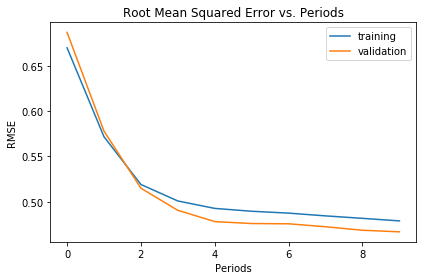

In [53]:
# Hepatocellular Carcinoma Patient Survival Prediction
# Andrea Mazzocchi
# v1 September 18, 2019

# Objective: 
"""Predict patient survival (yes/no) based on condition of liver (pressence of cirrhosis, nodules), lifestyle
(obesity, smoking, diabetes), and standard measures (biological sex, age)."""

# Hypothesis:
"""It is hypothesized that the data set will allow for predicition of survival (yes/no) with up to 
85% accuracy using condition of live, lifestyle, and standard measures factors."""

# Data Background: 
"""Publicly available data set from Kaggle entitled, "HCC dataset: Hepatocellular Carcinoma Dataset", 
uploaded by user mrsantos. The data contains 50 categories, 9 of which will be used for this study.

Features: age (20-93), gender (male/female, 0/1), cirrhosis (neg/pos, 0/1), nodules (0-5), 
          obesity (neg/pos, 0/1), smoking (neg/pos, 0/1), diabetes (neg/pos, 0/1), alcohol (neg/pos, 0/1),
          stage(1-4)
Label: class (dead/alive, 0/1)
"""

# Sample Size: 164 patients, 159 valid


# Plan of execution:
"""
1) Set objective and hypothesis, select categories/measures from dataset 
2) Import relevent libraries
3) Pre-process downloaded dataset (remove unused categories,remove incomplete sets, normalize non-binary data)
4) Randomly divide set into training (3/5), validation(1/5), and test(1/5) sets
5) Utiliize TensorFlow for logistic regression (train model)
6) Determine loss with training and validation data sets
7) Improve model through L1 regularization, L2 regularization, and learning rate
8) Use test set for final model analysis
9) Calculate final loss of model (training vs test) and output ROC and AUC curves
"""


# Step 1 - Set objective and hypothesis, select categories/measures from dataset (shown above)

# Step 2 - Import relevent libraries

#from _future_ import print_function

import math

from IPython import display 
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

# Step 3 - Pre-process downloaded dataset

# List contents in current directory
!ls

# Print working directory 
! pwd

# Opening dataset from directory 
hccSet = pd.read_csv("hcc-data-complete-balanced.csv")

# Removing unused categories (done by creating a dataframe that only includes categories of interest)
hccSet = hccSet[['Gender','Alcohol','Cirrhosis','Smoking','Diabetes','Obesity','Age','Nodule','Class']]
hccSet.shape


# Adding cancer stage at diagnosis
stage = pd.read_fwf('hcc-stages.txt')
stage.to_csv('hcc-stages.csv')
stage = pd.DataFrame(stage)
stage.columns=['Stage']
stageRow = len(stage)
hccSet[:-(204-stageRow)] # would like to change out use of 204
hccSet['Stage'] = stage

# Re-index Columns
columnsTitles = ["Gender","Alcohol","Cirrhosis","Smoking","Diabetes","Obesity","Age","Nodule","Stage","Class"]
hccSet = hccSet.reindex(columns=columnsTitles)


# Removing incomplete sets
hccSet = hccSet.replace('?', np.NaN)
hccSet = hccSet.dropna()
hccSet = hccSet.reset_index()

# Make all points floating
hccSet = hccSet.astype("float")

# Scale non-binary features to -1<x<1  (age, nodule, stage) - done by iterating through columns to determine if binary
for column in hccSet:
    a = hccSet[column].max() - hccSet[column].min()
    if a > 1 and column != 'index':
        mean = hccSet[column].mean()
        hccSet[column] = (hccSet[column].apply(lambda x: (float(x)-mean)/a))
    else:
        continue;
hccSet = hccSet.round(3)

# Further feature engineering for this data set is not required as all data is as integers or floating point

## Step 4 - Randomly divide set into training (~3/5), validation(~1/5), and test(~1/5) sets

# Reindex so data is randomized (already random, but will further randomize in case there is unknown bias)
hccSet = hccSet.reindex(np.random.permutation(hccSet.index))

# Select training examples (~3/5, 97 examples)
trainSet = hccSet.head(96)
remainSet = hccSet.tail(62)
# Select validation examples (~1/5, 31 examples)
valSet = hccSet.head(31)
# Select test examples (~1/5, 31 examples)
testSet = hccSet.tail(31)

# Separate features from targets (Class = target)
trainTarg = trainSet[['Class']]
trainFeat = trainSet[['Gender','Alcohol','Cirrhosis','Smoking','Diabetes','Obesity','Age','Nodule','Stage']]
valTarg = valSet[['Class']]
valFeat = valSet[['Gender','Alcohol','Cirrhosis','Smoking','Diabetes','Obesity','Age','Nodule','Stage']]
testTarg = testSet[['Class']]
testFeat = testSet[['Gender','Alcohol','Cirrhosis','Smoking','Diabetes','Obesity','Age','Nodule','Stage']]

# Check sets for similar representation
print("Training examples summary:")
display.display(trainFeat.describe())
print("Validation examples summary:")
display.display(valFeat.describe())
print("Training targets summary:")
display.display(trainTarg.describe())
print("Validation targets summary:")
display.display(valTarg.describe())

## Step 5 - Utiliize TensorFlow for logistic regression (train model)

def construct_feature_columns(input_features):
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])




def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):

    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def train_linear_regressor_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):

    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
    
    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["Class"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["Class"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["Class"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

    # How to view outputs
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []

    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
    
        # Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
        
        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")
  
    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    return linear_regressor

# Inputs for Function

linear_regressor = train_linear_regressor_model(
    learning_rate=0.001,
    steps=200,
    batch_size=10,
    training_examples=trainFeat,
    training_targets=trainTarg,
    validation_examples=valFeat,
    validation_targets=valTarg)
